In [162]:
# utils
import os
import glob
import qiime2 as q2
import pandas as pd
import numpy as np
from skbio import OrdinationResults

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

# plot colors
# cmap_methods = {'Aitchison':'#377eb8', 
#                 'Bray-Curtis':'#ff7f00', 
#                 'AU-MAP':'#4daf4a', 
#                 'A-PCoA': '#bf5b17',
#                 'U-MAP-rarefy': '#666666',
#                 'U-MAP':'#fdbf6f', 
#                 'Jaccard':'#999999', 
#                 'UniFrac':'#984ea3', 
#                 'W-UniFrac':'#e41a1c'}
cmap_methods = {'Aitchison': '#a6cee3',
                'Aitchison-UMAP': '#1f78b4',
                'Aitchison-UMAP-NN80': '#274F64',
                'Bray-Curtis': '#b2df8a',
                'Bray-Curtis-UMAP': '#33a02c',
                'Bray-Curtis-UMAP-NN80': '#33600B',
                'Euclidean': '#fb9a99',
                'Euclidean-UMAP': '#e31a1c',
                'Euclidean-UMAP-NN80': '#7C1B1A',
                'Jaccard': '#fdbf6f',
                'Jaccard-UMAP': '#ff7f00',
                'Jaccard-UMAP-NN80': '#975909',
                'UniFrac': '#cab2d6',
                'UniFrac-UMAP': '#6a3d9a',
                'UniFrac-UMAP-NN80': '#4B3357',
                'W-UniFrac': '#ffff99',
                'W-UniFrac-UMAP': '#B3B34D',
                'W-UniFrac-UMAP-NN80': '#80801A',
               }

order_ = [
    'Aitchison',
    'Aitchison-UMAP',
    'Aitchison-UMAP-NN80',
    'Bray-Curtis',
    'Bray-Curtis-UMAP',
    'Bray-Curtis-UMAP-NN80',
    'Euclidean',
    'Euclidean-UMAP',
    'Euclidean-UMAP-NN80',
    'Jaccard',
    'Jaccard-UMAP',
    'Jaccard-UMAP-NN80',
    'UniFrac',
    'UniFrac-UMAP',
    'UniFrac-UMAP-NN80',
    'W-UniFrac',
    'W-UniFrac-UMAP',
    'W-UniFrac-UMAP-NN80'
]

remap_names = {
    'Aitchison-UMAP': 'Aitchison-UMAP-N=15',
    'Aitchison-UMAP-NN80': 'Aitchison-UMAP-N=80',
    'Bray-Curtis-UMAP': 'Bray-Curtis-UMAP-N=15',
    'Bray-Curtis-UMAP-NN80': 'Bray-Curtis-UMAP-N=80',
    'Euclidean-UMAP': 'Euclidean-UMAP-N=15',
    'Euclidean-UMAP-NN80': 'Euclidean-UMAP-N=80',
    'Jaccard-UMAP': 'Jaccard-UMAP-N=15',
    'Jaccard-UMAP-NN80': 'Jaccard-UMAP-N=80',
    'UniFrac-UMAP': 'UniFrac-UMAP-N=15',
    'UniFrac-UMAP-NN80': 'UniFrac-UMAP-N=80',
    'W-UniFrac-UMAP': 'W-UniFrac-UMAP-N=15',
    'W-UniFrac-UMAP-NN80': 'W-UniFrac-UMAP-N=80',
}


### quant. plots

In [98]:
# import
perm_res_df = pd.read_csv('results/eval-tables/distance-stats.tsv',
                          sep='\t')
perm_res_df = perm_res_df.loc[perm_res_df['method'].isin(order_)]
perm_res_df.head(10)



,dataset,method,Eval,test statistic
0,keyboard,Aitchison-UMAP,PERMANOVA,2944.506131
1,keyboard,Euclidean-UMAP,PERMANOVA,141.118716
2,keyboard,Jaccard-UMAP,PERMANOVA,4095.255652
3,keyboard,Bray-Curtis-UMAP,PERMANOVA,788.949658
4,keyboard,UniFrac-UMAP,PERMANOVA,1714.799930
5,keyboard,W-UniFrac-UMAP,PERMANOVA,612.321876
6,keyboard,Aitchison-UMAP-NN80,PERMANOVA,490.195901
7,keyboard,Euclidean-UMAP-NN80,PERMANOVA,136.533268
8,keyboard,Jaccard-UMAP-NN80,PERMANOVA,513.868837
9,keyboard,Bray-Curtis-UMAP-NN80,PERMANOVA,3317.102278


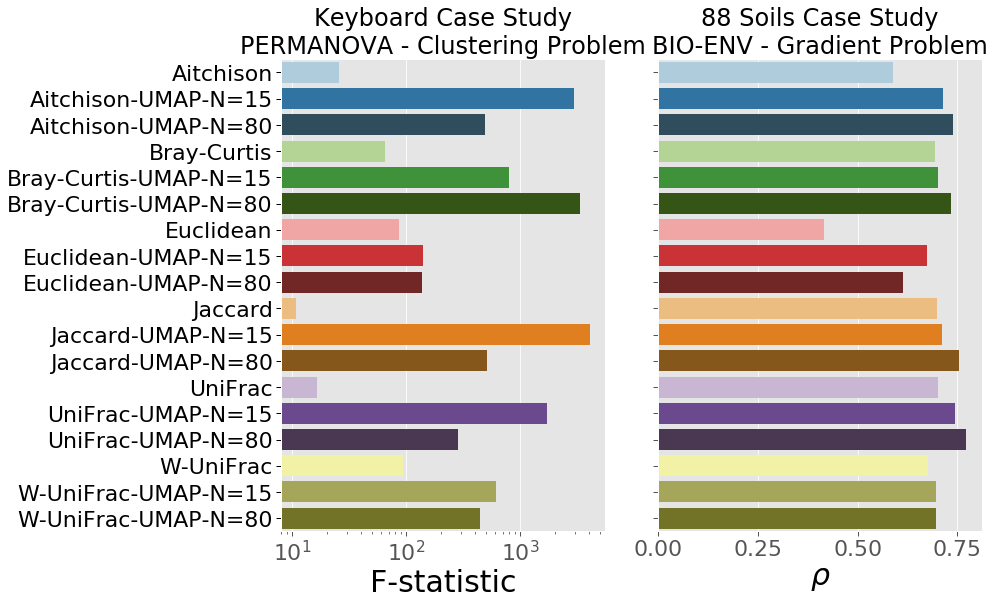

In [99]:
# set label font-sizes globally
paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 22 
plt.rcParams['ytick.labelsize'] = 22

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,8.5), sharey=False)

perm_res_df.sort_values('method', inplace=True)
def remap(x):
    return remap_names.get(x, x)
def remap_dictkeys(x):
    x, y = x
    return (remap_names.get(x, x), y)
perm_res_df['method'] = perm_res_df['method'].apply(remap)
remap_order_ = list(map(remap, order_))
remap_cmap_methods = dict(map(remap_dictkeys, cmap_methods.items()))
sns.barplot(x='test statistic', y='method',
            data=perm_res_df[perm_res_df.dataset.isin(['keyboard'])],
             hue_order = remap_order_,
            palette=remap_cmap_methods, ax = ax1)
ax1.set_xscale('log')

sns.barplot(x='test statistic', y='method',
            data=perm_res_df[perm_res_df.dataset.isin(['soils'])],
            hue_order = remap_order_,
            palette=remap_cmap_methods, ax = ax2)
# ax2.set_xlim(0, 1)

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_xlabel('F-statistic', fontsize=30, color='black')
ax2.set_xlabel('$\\rho$', fontsize=30, color='black')

ax1.set_title('Keyboard Case Study\nPERMANOVA - Clustering Problem',
              fontsize=24, color='black')
ax2.set_title('88 Soils Case Study\nBIO-ENV - Gradient Problem',
              fontsize=24, color='black')

ax1.tick_params(axis='y', colors='black')
ax2.set_yticklabels([])


plt.tight_layout()
# save the figure to file
plt.savefig('results/figures/dist-quant.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.show()


In [252]:
#import 
ML_res = pd.read_csv('results/eval-tables/KNN-stats.tsv',
                     sep='\t')
ML_res = ML_res.loc[ML_res['method'].isin(order_)]
ML_res.head(15)


,dataset,KNN,Eval,weights,k,method,value
0,keyboard,KNN-Classifier,APR,uniform,1,Aitchison-UMAP,1.000000
1,keyboard,KNN-Classifier,AUC,uniform,1,Aitchison-UMAP,1.000000
2,keyboard,KNN-Classifier,APR,distance,24,Euclidean-UMAP,0.998767
3,keyboard,KNN-Classifier,AUC,distance,24,Euclidean-UMAP,0.997997
4,keyboard,KNN-Classifier,APR,uniform,1,Jaccard-UMAP,1.000000
5,keyboard,KNN-Classifier,AUC,uniform,1,Jaccard-UMAP,1.000000
6,keyboard,KNN-Classifier,APR,distance,32,Bray-Curtis-UMAP,1.000000
7,keyboard,KNN-Classifier,AUC,distance,32,Bray-Curtis-UMAP,1.000000
8,keyboard,KNN-Classifier,APR,uniform,1,UniFrac-UMAP,1.000000
9,keyboard,KNN-Classifier,AUC,uniform,1,UniFrac-UMAP,1.000000


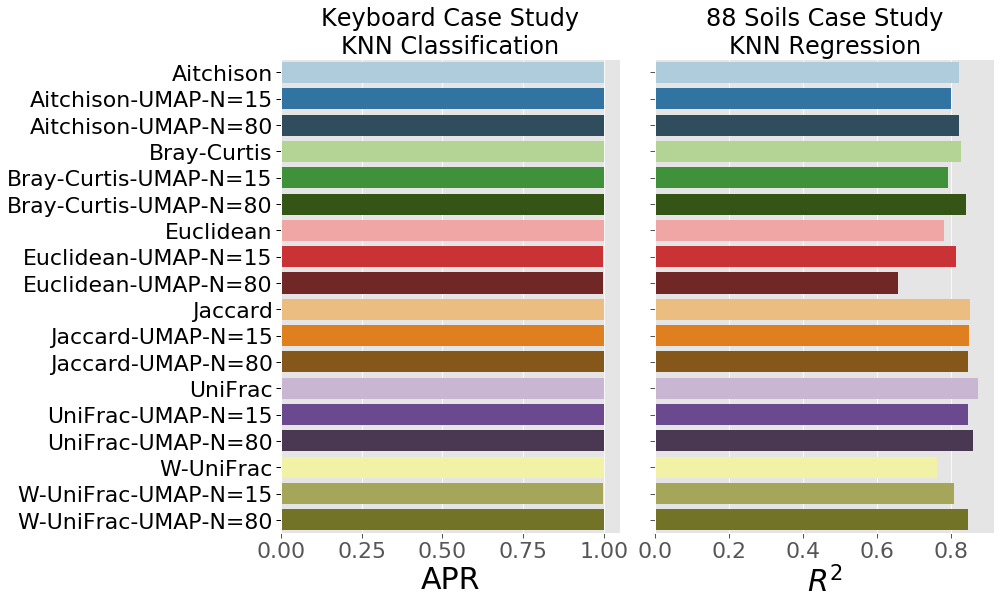

In [253]:
# set label font-sizes globally
paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 22 
plt.rcParams['ytick.labelsize'] = 22

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 8.5), sharey=False)

ML_res.sort_values('method', inplace=True)

def remap(x):
    return remap_names.get(x, x)
def remap_dictkeys(x):
    x, y = x
    return (remap_names.get(x, x), y)

ML_res['method'] = ML_res['method'].apply(remap)
remap_order_ = list(map(remap, order_))
remap_cmap_methods = dict(map(remap_dictkeys, cmap_methods.items()))

sns.barplot(x='value', y='method',
            data=ML_res[ML_res.dataset.isin(['keyboard']) & ML_res.Eval.isin(['APR'])],
             hue_order = remap_order_,
            palette=remap_cmap_methods, ax = ax1)
#ax1.set_xscale('log')

sns.barplot(x='value', y='method',
            data=ML_res[ML_res.dataset.isin(['soils']) & ML_res.Eval.isin(['$R^{2}$'])],
            hue_order = remap_order_,
            palette=remap_cmap_methods, ax = ax2)
#ax2.set_xlim(0, 1)

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_xlabel('APR', fontsize=30, color='black')
ax2.set_xlabel('$R^2$', fontsize=30, color='black')

ax1.set_title('Keyboard Case Study\nKNN Classification',
              fontsize=24, color='black')
ax2.set_title('88 Soils Case Study\nKNN Regression',
              fontsize=24, color='black')

ax1.tick_params(axis='y', colors='black')
ax2.set_yticklabels([])


plt.tight_layout()
# save the figure to file
plt.savefig('results/figures/KNN-quant.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')
plt.show()


In [254]:
all_ML_res = pd.read_csv('results/eval-tables/KNN-stats-total.tsv',
                         sep='\t')
all_ML_res = all_ML_res.loc[all_ML_res['Eval'].isin(['APR', '$R^{2}$'])]
all_ML_res = all_ML_res.loc[all_ML_res['method'].isin(order_)]
all_ML_res.head()

,dataset,KNN,Eval,weights,k,method,value
0,keyboard,KNN-Classifier,APR,uniform,1,Aitchison-UMAP,1.0
1,keyboard,KNN-Classifier,APR,distance,1,Aitchison-UMAP,1.0
2,keyboard,KNN-Classifier,APR,uniform,2,Aitchison-UMAP,1.0
3,keyboard,KNN-Classifier,APR,distance,2,Aitchison-UMAP,1.0
4,keyboard,KNN-Classifier,APR,uniform,3,Aitchison-UMAP,1.0


/Users/garmstro/miniconda3/envs/qiime2-2019.10-dev/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/garmstro/miniconda3/envs/qiime2-2019.10-dev/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


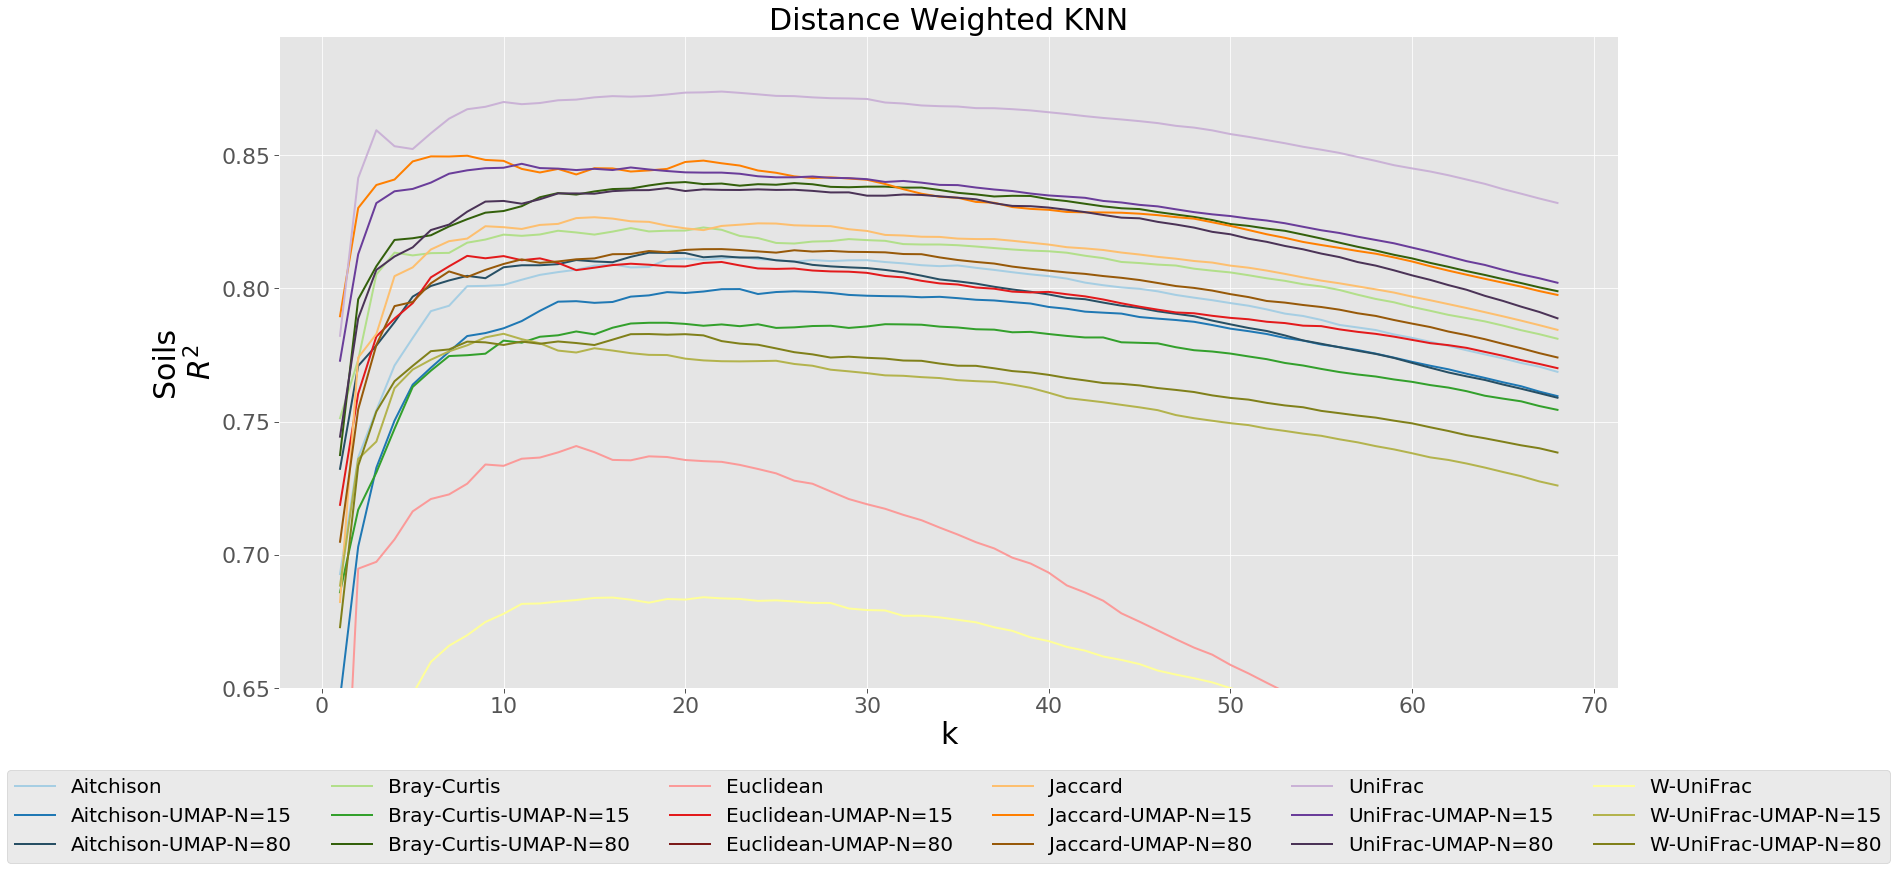

In [277]:
key_knn = all_ML_res.query("dataset == 'keyboard'")
soi_knn = all_ML_res.query("dataset == 'soils'")
key_unif_knn = key_knn.query("weights == 'uniform' and k <= 45")
key_dist_knn = key_knn.query("weights == 'distance' and k <= 45")
soi_unif_knn = soi_knn.query("weights == 'uniform' and k <= 30")
soi_dist_knn = soi_knn.query("weights == 'distance' and k <= 70")

def remap(x):
    return remap_names.get(x, x)
def remap_dictkeys(x):
    x, y = x
    return (remap_names.get(x, x), y)

remap_order_ = list(map(remap, order_))
remap_cmap_methods = dict(map(remap_dictkeys, cmap_methods.items()))

paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 22 
plt.rcParams['ytick.labelsize'] = 22

ylabels = {(0, 0): 'Keyboard\nAPR', (1, 0): 'Soils\n${R^{2}}$', (1, 1): 'Soils\n${R^{2}}$'}
xlabels = {(1, 0): 'k', (1, 1): 'k'}
ylims = {(0, 0): {'bottom': 0.97}, (0, 1): {'bottom': 0.97}, (1, 0): {'bottom': 0.65}, (1, 1): {'bottom': 0.65}}
titles = {(0, 0): 'Distance Weighted KNN'}  # , (0, 1): 'Distance Weighted KNN'}
dfs = [key_unif_knn, key_dist_knn, soi_unif_knn, soi_dist_knn]
dfs = [soi_unif_knn,soi_dist_knn]
dfs = [soi_dist_knn]
fig, ax = plt.subplots(1, 1, figsize=(24, 12))
ax = [ax]
for i, df in enumerate(dfs):
    df.loc[:, 'method'] = df['method'].apply(remap)
    coords = (i // 2, i % 2)
    coords = i
    this_ax = ax[coords]#, coords[1]]
    # this_ax.set_facecolor('white')
    sns.lineplot(x='k', y='value', data=df, hue='method', hue_order = remap_order_,
                 palette=remap_cmap_methods, ax=this_ax, legend=False)
    
    this_ax.set_ylabel(ylabels.get((1, coords), ''),
                       fontsize=30, color='black')
    this_ax.set_xlabel(xlabels.get((1, coords), ''),
                       fontsize=30, color='black')
    this_ax.set_title(titles.get((0, coords), ''),
                      fontsize=30, color='black')
    this_ax.set_ylim(**ylims.get((1, coords), {}))

# ax[1].subplots_adjust(wspace=0.33)
ax[0].legend(ax[0].get_lines(),
           labels=remap_order_,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.11),
           # bbox_to_anchor=(0.9, 0.07),
           ncol = 6,
           fontsize = 20
          )
# fig.legend([ax[0, 0]])
# plt.tight_layout()
plt.savefig('results/figures/knn-acc-vs-k.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()


## qual. plots

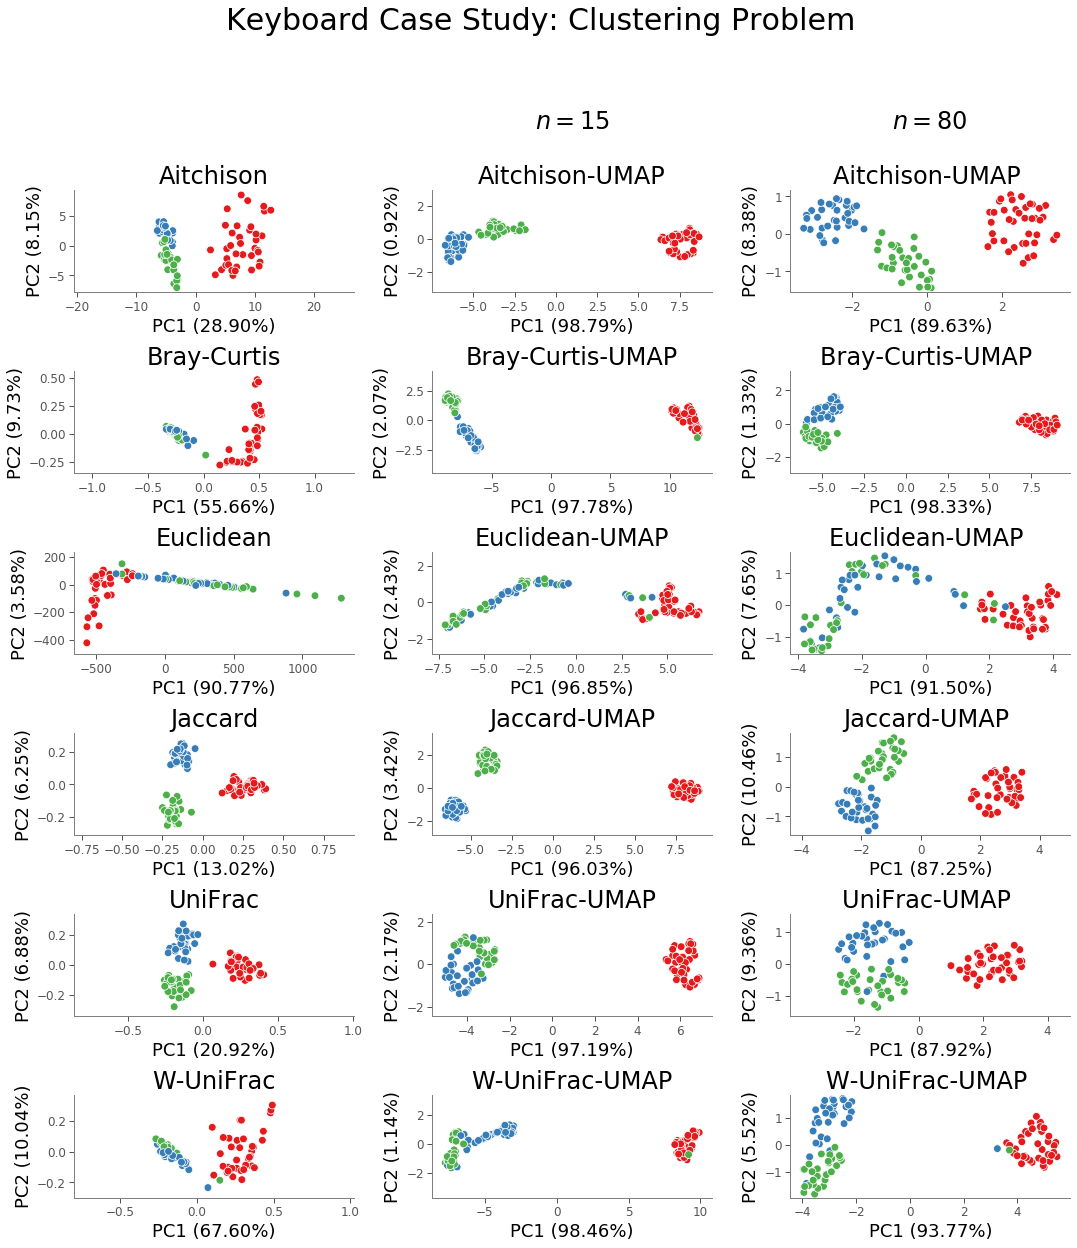

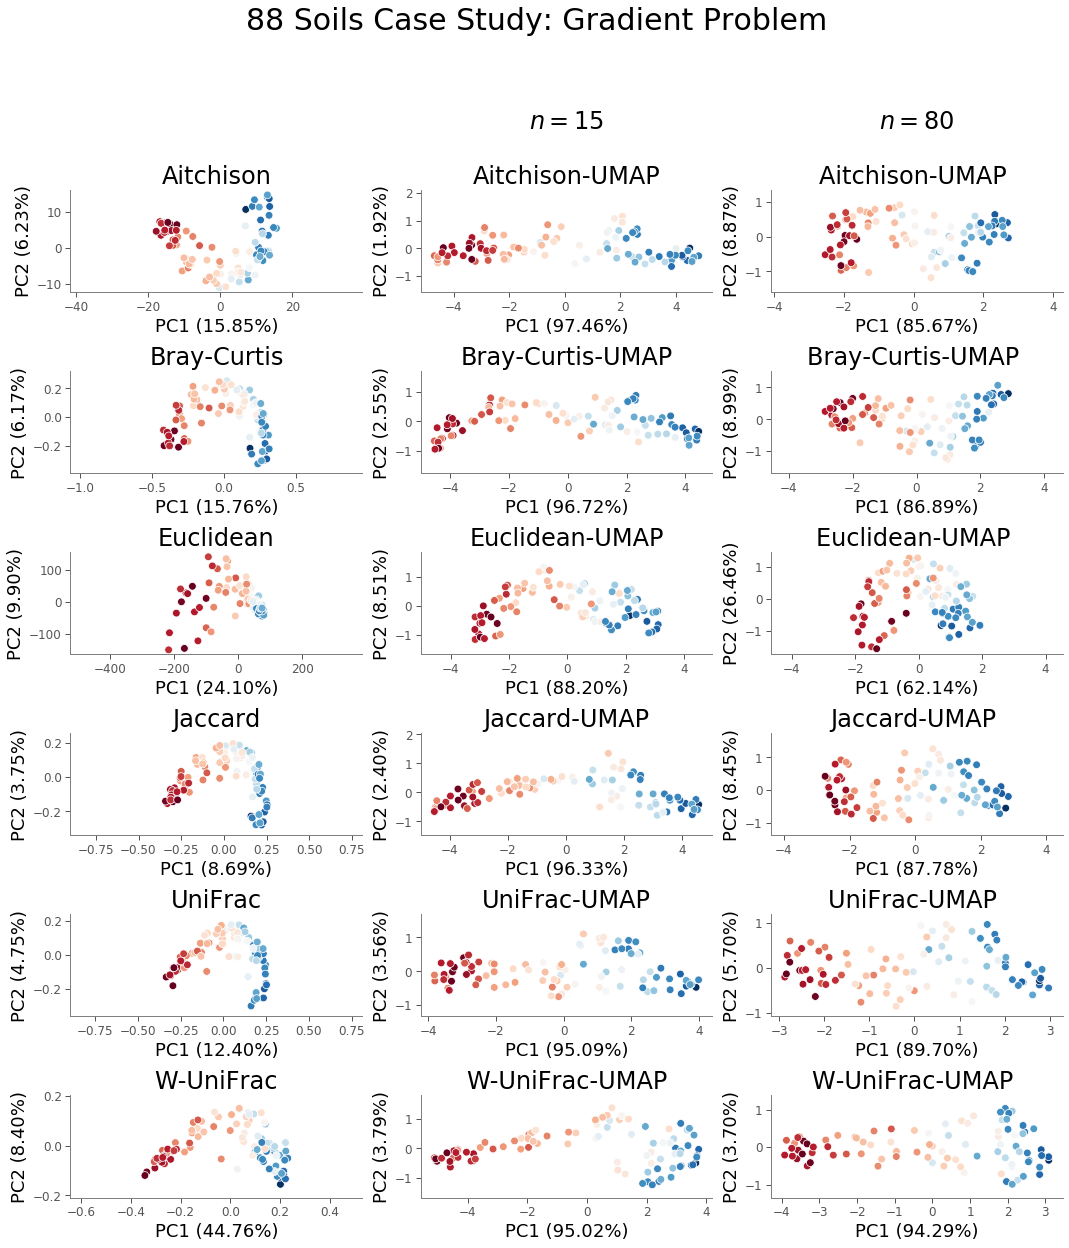

In [251]:
# set label font-sizes globally
paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12

# metrics = {
#     'Aitchison': 'aitchison-mds-pcoa_results.qza',
#     'Aitchison-UMAP':'aitchison-umap-pcoa_results.qza',
#     'Bray-Curtis':'bray_curtis_pcoa_results.qza',
#     'Bray-Curtis-UMAP': 'braycurtis-umap-pcoa_results.qza',
#     'Euclidean': 'euclidean-mds-pcoa_results.qza',
#     'Euclidean-UMAP':'euclidean-umap-pcoa_results.qza',
#     'Jaccard':'jaccard_pcoa_results.qza',
#     'Jaccard-UMAP': 'jaccard-umap-pcoa_results.qza',
#     'UniFrac':'unweighted_unifrac_pcoa_results.qza',
#     'UniFrac-UMAP': 'unweighted-unifrac-umap-pcoa_results.qza',
#     'W-UniFrac':'weighted_unifrac_pcoa_results.qza',
#     'W-UniFrac-UMAP': 'weighted-unifrac-umap-pcoa_results.qza',
# }
metrics = {
    'Aitchison': 'aitchison-mds-pcoa_results.qza',
    '${n=15}$\n\nAitchison-UMAP':'aitchison-umap-pcoa_results.qza',
    '${n=80}$\n\nAitchison-UMAP ':'aitchison-umap-nn50-pcoa_results.qza',
    'Bray-Curtis':'bray_curtis_pcoa_results.qza',
    'Bray-Curtis-UMAP': 'braycurtis-umap-pcoa_results.qza',
    'Bray-Curtis-UMAP ': 'braycurtis-umap-nn50-pcoa_results.qza',
    'Euclidean': 'euclidean-mds-pcoa_results.qza',
    'Euclidean-UMAP':'euclidean-umap-pcoa_results.qza',
    'Euclidean-UMAP ':'euclidean-umap-nn50-pcoa_results.qza',
    'Jaccard':'jaccard_pcoa_results.qza',
    'Jaccard-UMAP': 'jaccard-umap-pcoa_results.qza',
    'Jaccard-UMAP ': 'jaccard-umap-nn50-pcoa_results.qza',
    'UniFrac':'unweighted_unifrac_pcoa_results.qza',
    'UniFrac-UMAP': 'unweighted-unifrac-umap-pcoa_results.qza',
    'UniFrac-UMAP ': 'unweighted-unifrac-umap-nn50-pcoa_results.qza',
    'W-UniFrac':'weighted_unifrac_pcoa_results.qza',
    'W-UniFrac-UMAP': 'weighted-unifrac-umap-pcoa_results.qza',
    'W-UniFrac-UMAP ': 'weighted-unifrac-umap-nn50-pcoa_results.qza',
}
eval_col = {'keyboard':'host_subject_id',
            'soils':'ph',
           }
cmap_col = {'keyboard':'Set1',
            'soils':'RdBu'}
supt_col = {'keyboard':'Keyboard Case Study: Clustering Problem',
            'soils':'88 Soils Case Study: Gradient Problem'}


ML_res = {}
for data_set in ['keyboard', 'soils']:
    mf_ = pd.read_csv(glob.glob(os.path.join('data', data_set, '*.txt'))[0],
                      sep='\t', index_col=0)
    
    fig, axn = plt.subplots(6,3, figsize=(15, 8 * 6 / 3))

    
    for (mname_, metric), ax in zip(metrics.items(), axn.flatten()):
        ord_ = q2.Artifact.load(os.path.join('results', data_set, metric))
        ord_ = ord_.view(OrdinationResults)
        ord_samps = pd.concat([ord_.samples, mf_], axis=1, sort=False).dropna()
        sns.scatterplot(x=0, y=1, s=60,
                        hue=eval_col[data_set],
                        data=ord_samps,
                        palette=cmap_col[data_set],
                        ax=ax)
        ax.legend_.remove()
        ax.set_xlabel('PC1 (%.2f%%)' % (ord_.proportion_explained[0] * 100),
                     color='black', fontsize=18)
        ax.set_ylabel('PC2 (%.2f%%)' % (ord_.proportion_explained[1] * 100),
                      color='black', fontsize=18)
        ax.set_title(mname_,
                     color='black',
                     fontsize=24)
        # remove all grids, backrounds etc ...
        ax.set_facecolor('white')
        ax.set_axisbelow(True)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['top'].set_visible(False)
        ax.set_aspect('equal', 'datalim')
        for child in ax.get_children():
            if isinstance(child, matplotlib.spines.Spine):
                child.set_color('grey')

    # set the backrounf to be transparent
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(0.0)

        
    plt.suptitle(supt_col[data_set],
                 fontsize=30,
                 color='black', y=1.08)

    plt.tight_layout()
    # save the figure to file
    plt.savefig('results/figures/%s-ords.pdf' % (data_set),dpi=1000, 
                bbox_inches='tight',
                facecolor=fig.get_facecolor(), 
                edgecolor='none')
    plt.show()



metric	PC1	PC2
Aitchison	ph	carb_nitro_ratio
	0.85	0.12

metric	PC1	PC2
Bray-Curtis	ph	carb_nitro_ratio
	0.84	0.21

metric	PC1	PC2
Euclidean	ph	latitude
	0.71	0.38

metric	PC1	PC2
Jaccard	ph	carb_nitro_ratio
	0.86	0.13

metric	PC1	PC2
UniFrac	ph	carb_nitro_ratio
	0.89	0.09

metric	PC1	PC2
W-UniFrac	ph	carb_nitro_ratio
	0.81	0.19



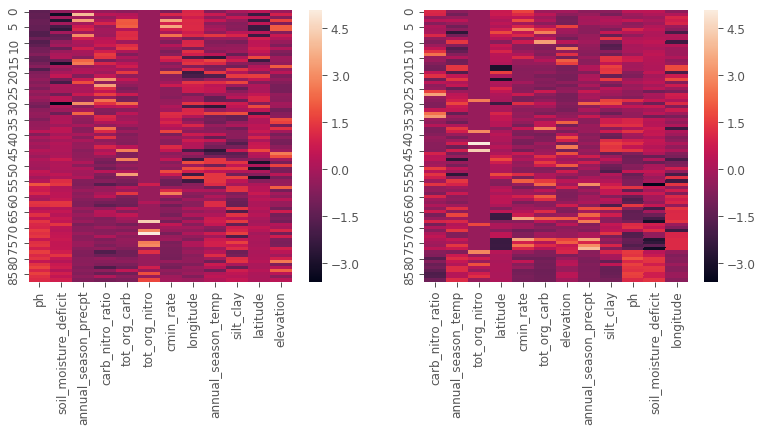

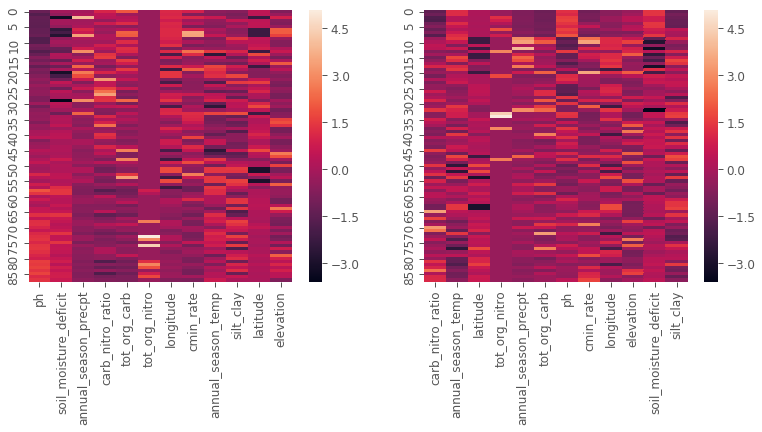

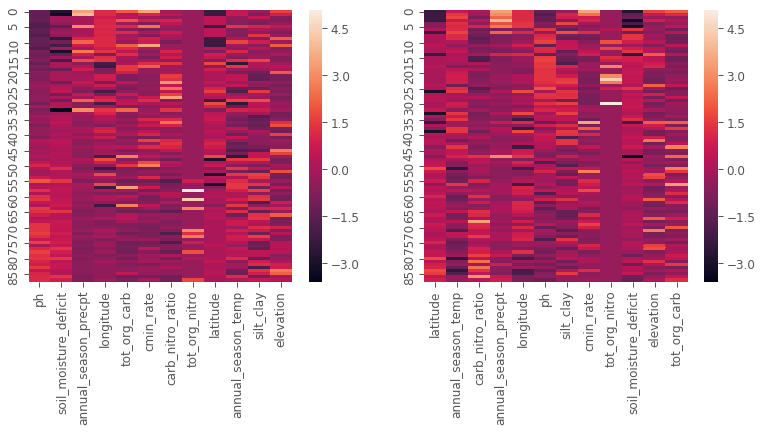

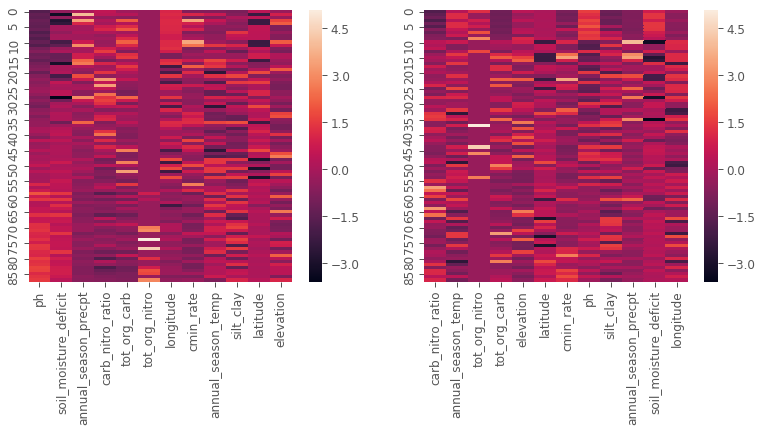

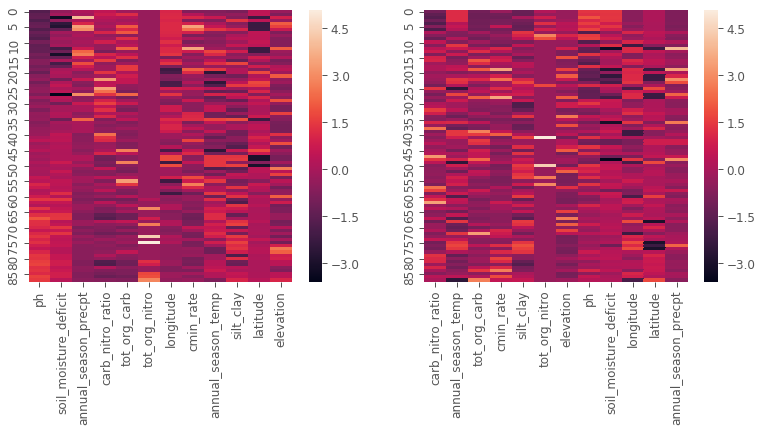

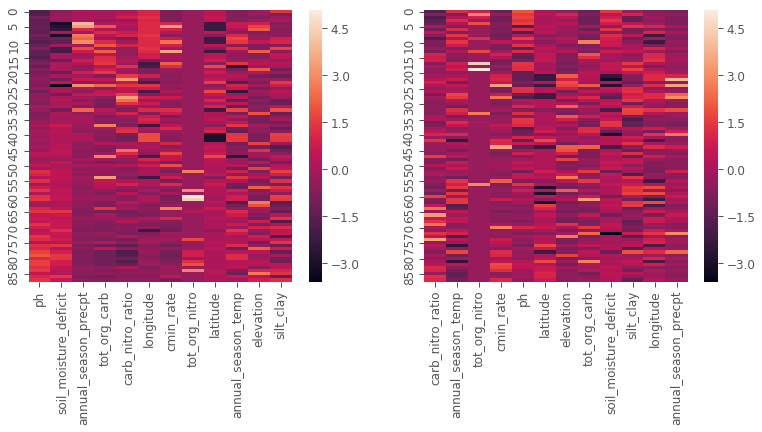

In [248]:
# set label font-sizes globally
paper_rc = {'lines.linewidth': 2, 
            'lines.markersize': 10}                  
sns.set_context("paper", rc = paper_rc)   
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12

# metrics = {
#     'Aitchison': 'aitchison-mds-pcoa_results.qza',
#     'Aitchison-UMAP':'aitchison-umap-pcoa_results.qza',
#     'Bray-Curtis':'bray_curtis_pcoa_results.qza',
#     'Bray-Curtis-UMAP': 'braycurtis-umap-pcoa_results.qza',
#     'Euclidean': 'euclidean-mds-pcoa_results.qza',
#     'Euclidean-UMAP':'euclidean-umap-pcoa_results.qza',
#     'Jaccard':'jaccard_pcoa_results.qza',
#     'Jaccard-UMAP': 'jaccard-umap-pcoa_results.qza',
#     'UniFrac':'unweighted_unifrac_pcoa_results.qza',
#     'UniFrac-UMAP': 'unweighted-unifrac-umap-pcoa_results.qza',
#     'W-UniFrac':'weighted_unifrac_pcoa_results.qza',
#     'W-UniFrac-UMAP': 'weighted-unifrac-umap-pcoa_results.qza',
# }
metrics = {
    'Aitchison': 'aitchison-mds-pcoa_results.qza',
    'Bray-Curtis':'bray_curtis_pcoa_results.qza',
    'Euclidean': 'euclidean-mds-pcoa_results.qza',
    'Jaccard':'jaccard_pcoa_results.qza',
    'UniFrac':'unweighted_unifrac_pcoa_results.qza',
    'W-UniFrac':'weighted_unifrac_pcoa_results.qza',
}
eval_col = {'keyboard':'host_subject_id',
            # 'soils':'ph',
            'soils':'carb_nitro_ratio',
           }
cmap_col = {'keyboard':'Set1',
            'soils':'RdBu'}
supt_col = {'keyboard':'Keyboard Case Study: Clustering Problem',
            'soils':'88 Soils Case Study: Gradient Problem'}


ML_res = {}
for data_set in ['soils']:
    mf_ = pd.read_csv(glob.glob(os.path.join('data', data_set, '*.txt'))[0],
                      sep='\t', index_col=0)
    
    # fig, axn = plt.subplots(2,3, figsize=(15, 8 * 6 / 3))

    
    for (mname_, metric), ax in zip(metrics.items(), axn.flatten()):
        ord_ = q2.Artifact.load(os.path.join('results', data_set, metric))
        ord_ = ord_.view(OrdinationResults)
        ord_samps = pd.concat([ord_.samples, mf_], axis=1, sort=False).dropna()
        is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
        df = ord_samps.iloc[:, 88:]
        df = df.loc[:, is_number(df.dtypes)]
        df = df.drop(['collection_date', 'qiita_study_id'], axis='columns')
        pcs = ord_samps.iloc[:, :88]

        pc1s = pd.DataFrame({col: pcs.iloc[:, 0] for col in df.columns})
        pc1_corr = df.corrwith(pc1s) ** 2
        pc1s_position = pc1_corr.argsort()
        sortby_pc1 = pcs.iloc[:, 0].argsort()
        pc2s = pd.DataFrame({col: pcs.iloc[:, 1] for col in df.columns})
        pc2_corr = df.corrwith(pc2s) ** 2
        pc2s_position = pc2_corr.argsort()
        sortby_pc2 = pcs.iloc[:, 1].argsort()
        max_pc1 = pc1_corr[pc1s_position].max()
        max_pc1_var = pc1_corr[pc1s_position].idxmax()
        max_pc2 = pc2_corr[pc2s_position].max()
        max_pc2_var = pc2_corr[pc2s_position].idxmax()
        print('metric' + '\t' + "PC1\tPC2")
        print(mname_ + "\t{}\t{}".format(max_pc1_var, max_pc2_var))
        print("\t{:.2f}\t{:.2f}".format(max_pc1, max_pc2))
        # print(max_pc2_var, max_pc2)
        print()
        # sns.scatterplot(x=0, y=1, s=60,
        #                 hue=eval_col[data_set],
        #                 data=ord_samps,
        #                 palette=cmap_col[data_set],
        #                 ax=ax)
        # ax.legend_.remove()
        # ax.set_xlabel('PC1 (%.2f%%)' % (ord_.proportion_explained[0] * 100),
        #              color='black', fontsize=18)
        # ax.set_ylabel('PC2 (%.2f%%)' % (ord_.proportion_explained[1] * 100),
        #               color='black', fontsize=18)
        # ax.set_title(mname_,
        #              color='black',
        #              fontsize=24)
        # # remove all grids, backrounds etc ...
        # ax.set_facecolor('white')
        # ax.set_axisbelow(True)
        # ax.spines['right'].set_visible(False)
        # ax.spines['left'].set_visible(True)
        # ax.spines['bottom'].set_visible(True)
        # ax.spines['top'].set_visible(False)
        # ax.set_aspect('equal', 'datalim')
        # for child in ax.get_children():
        #     if isinstance(child, matplotlib.spines.Spine):
        #         child.set_color('grey')

    # set the backrounf to be transparent
        fig, ax = plt.subplots(1, 2, figsize=(13, 5))
        norm = StandardScaler()
        sorted_df = df[df.columns[pc1s_position[::-1]]]
        sorted_sorted_df = sorted_df.iloc[sortby_pc1]
        normed_df = pd.DataFrame(norm.fit_transform(sorted_sorted_df), columns=sorted_df.columns)
        sns.heatmap(normed_df, ax=ax[0])

        norm = StandardScaler()
        sorted_df = df[df.columns[pc2s_position[::-1]]]
        sorted_sorted_df = sorted_df.iloc[sortby_pc2]
        normed_df = pd.DataFrame(norm.fit_transform(sorted_sorted_df), columns=sorted_df.columns)
        sns.heatmap(normed_df, ax=ax[1])
    # fig.patch.set_facecolor('white')
    # fig.patch.set_alpha(0.0)
# 
    #     
    # plt.suptitle(supt_col[data_set],
    #              fontsize=30,
    #              color='black', y=1.08)
# 
    # plt.tight_layout()
    # # save the figure to file
    # plt.savefig('results/figures/%s-ords.pdf' % (data_set),dpi=1000, 
    #             bbox_inches='tight',
    #             facecolor=fig.get_facecolor(), 
    #             edgecolor='none')
    # plt.show()


is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
df = ord_samps.iloc[:, 88:]
df = df.loc[:, is_number(df.dtypes)]
df = df.drop(['collection_date', 'qiita_study_id'], axis='columns')
pcs = ord_samps.iloc[:, :88]

pc1s = pd.DataFrame({col: pcs.iloc[:, 0] for col in df.columns})
pc1_corr = df.corrwith(pc1s)
pc1s_position = pc1_corr.argsort()
sortby_pc1 = pcs.iloc[:, 0].argsort()
pc2s = pd.DataFrame({col: pcs.iloc[:, 1] for col in df.columns})
pc2_corr = df.corrwith(pc2s)
pc2s_position = pc2_corr.argsort()
sortby_pc2 = pcs.iloc[:, 1].argsort()

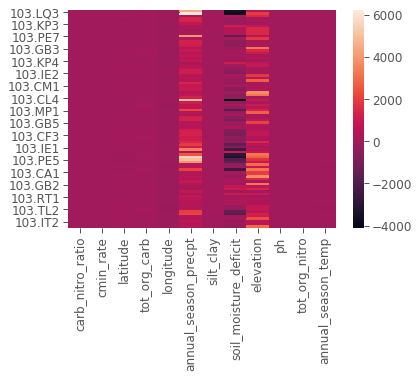

In [198]:
sns.heatmap(df[df.columns[pc2s_position[::-1]]])

In [206]:
from sklearn.preprocessing import StandardScaler

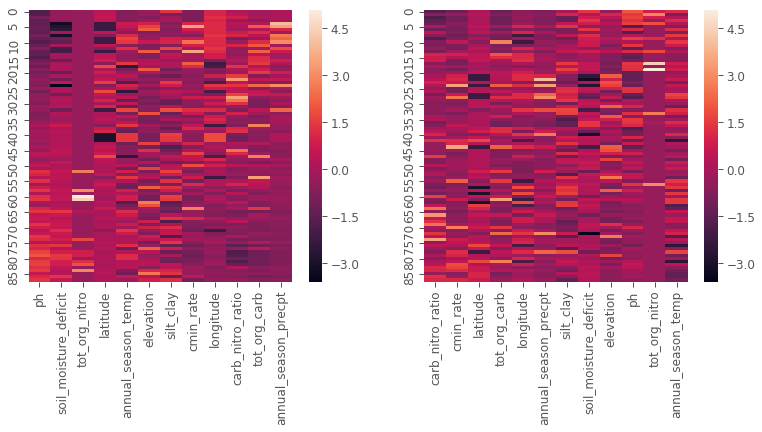

In [228]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
norm = StandardScaler()
sorted_df = df[df.columns[pc1s_position[::-1]]]
sorted_sorted_df = sorted_df.iloc[sortby_pc1]
normed_df = pd.DataFrame(norm.fit_transform(sorted_sorted_df), columns=sorted_df.columns)
sns.heatmap(normed_df, ax=ax[0])

norm = StandardScaler()
sorted_df = df[df.columns[pc2s_position[::-1]]]
sorted_sorted_df = sorted_df.iloc[sortby_pc2]
normed_df = pd.DataFrame(norm.fit_transform(sorted_sorted_df), columns=sorted_df.columns)
sns.heatmap(normed_df, ax=ax[1])

In [208]:
normed_df

,ph,soil_moisture_deficit,tot_org_nitro,latitude,annual_season_temp,elevation,silt_clay,cmin_rate,longitude,carb_nitro_ratio,tot_org_carb,annual_season_precpt
0,0.000811,-0.612336,0.00000,0.003176,0.003558,0.121488,0.006074,0.000640,-0.011426,0.003922,0.011125,0.780996
1,0.000547,-0.493813,0.00000,-0.001746,0.002269,0.266926,0.004271,0.002069,-0.009554,0.002462,0.007941,0.827471
2,0.005315,0.283715,0.00339,0.021959,0.008634,0.946571,0.014071,0.001302,-0.068264,0.003198,0.001919,0.134311
3,0.004064,-0.144358,0.00000,-0.019435,0.016118,0.105115,0.056061,0.003013,-0.039021,0.006293,0.015487,0.981073
4,0.004205,-0.144369,0.00000,-0.019436,0.016119,0.105123,0.054664,0.002733,-0.039024,0.006560,0.015208,0.981152
...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.006282,0.066075,0.00000,0.036500,0.005506,0.917711,0.054228,0.006454,-0.085417,0.012097,0.025863,0.375427
84,0.002337,0.042787,0.00000,0.016696,0.002510,0.987385,0.009874,0.003794,-0.043335,0.013083,0.007447,0.143994
85,0.005568,-0.269236,0.00000,0.048468,0.003082,0.564975,0.019517,0.016439,-0.097758,0.023626,0.040165,0.770420
86,0.007225,-0.017234,0.00000,0.071454,0.000530,0.767572,0.027839,0.007689,-0.138799,0.041993,0.015378,0.619095
